In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from selenium import webdriver
from requests_html import HTML
import numpy as np 
from selenium.webdriver.chrome.options import Options 

In [3]:
options = Options()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options, executable_path=r'C:\chromedriver\chromedriver.exe')

In [4]:
df = pd.read_json(r'Clothing_Shoes_and_Jewelry_5.json', lines=True)

In [5]:
df.shape

(278677, 9)

In [6]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"
5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""","[0, 0]",I received this today and I'm not a fan of it ...,4,It's ok,1396224000,"03 31, 2014"
6,A16GFPNVF4Y816,0000031887,design maven,"[0, 0]",Bought this as a backup to the regular ballet ...,5,Great for dress-up and for ballet practice,1399075200,"05 3, 2014"
7,A2M2APVYIB2U6K,0000031887,Jamie P.,"[0, 0]",Great tutu for a great price. It isn't a &#34;...,5,Great value,1356220800,"12 23, 2012"
8,A1NJ71X3YPQNQ9,0000031887,JBerger,"[0, 0]","My daughter liked this, and it with her costum...",4,Good,1384041600,"11 10, 2013"
9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5,WOW !! ..is all I have to say!,1349568000,"10 7, 2012"


In [7]:
df.overall.isna().any()

False

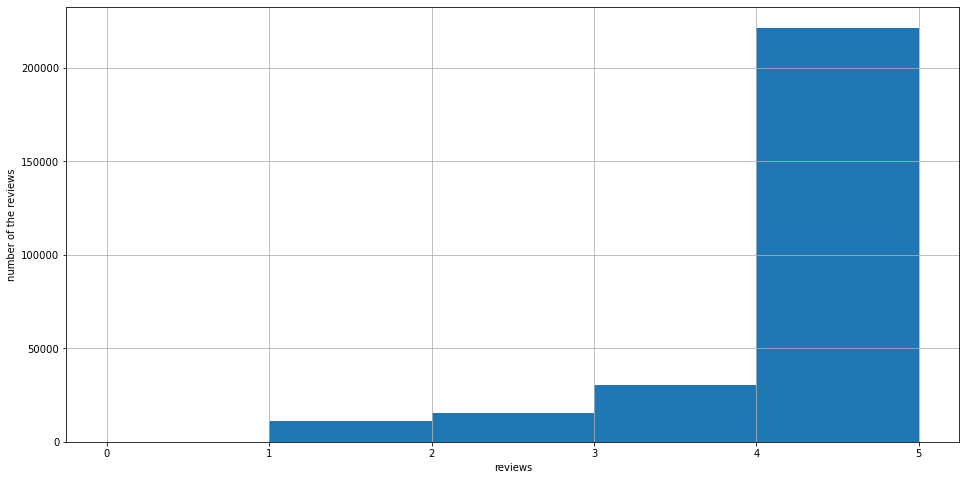

In [8]:
#visualizing the distribution of the reviews on the original dataset
plt.figure(figsize=(16, 8))
plt.xlabel('reviews')
plt.ylabel('number of the reviews')
df.overall.hist(bins=[0,1,2,3,4,5])

In [9]:
df2 = df.drop(['reviewerName', 'helpful', 'reviewText', 'summary', 'unixReviewTime', 'reviewTime'], axis=1)

In [10]:
#i'm going to run the rest of the code on a subset of the dataset due to time and space complexity 
df3 = df2.iloc[0:10000, :]

In [11]:
df3.head()

,reviewerID,asin,overall
0,A1KLRMWW2FWPL4,0000031887,5
1,A2G5TCU2WDFZ65,0000031887,5
2,A1RLQXYNCMWRWN,0000031887,5
3,A8U3FAMSJVHS5,0000031887,5
4,A3GEOILWLK86XM,0000031887,5


In [12]:
df3.shape

(10000, 3)

In [79]:
#most well ratted items
dfr = pd.DataFrame(df3.groupby(['asin'])['overall'].mean())
dfm = pd.DataFrame(df3.groupby(['asin'])['overall'].count())

In [80]:
dfm.shape

(566, 1)

In [81]:
dfm.sort_values('overall', ascending = False).head()

,overall
asin,
B0000C321X,205
B0001ZNZJM,197
B00012O12A,189
B0002TOZ1E,127
B0000ANHST,117


In [82]:
dfr.sort_values('overall', ascending = False).head()

,overall
asin,
B0002KWZ3I,5.0
B00062NN42,5.0
B0000ZFEWY,5.0
B0002Z1KR0,5.0
B0000ASDJH,5.0


In [84]:
dff= dfm.merge(dfr, left_on='asin', right_on ='asin', how='left', suffixes=('_count', '_mean'))
dff.sort_values('overall_mean', ascending = False).head()

,overall_count,overall_mean
asin,,
B0002KWZ3I,5,5.0
B00062NN42,5,5.0
B0000ZFEWY,9,5.0
B0002Z1KR0,5,5.0
B0000ASDJH,7,5.0


In [85]:
threshold = 50
dff = dff.query('overall_count >= @threshold')

In [86]:
dff.shape

(39, 2)

In [87]:
title_lookup = "#productTitle"
qs = "B0001ZNZF6"

In [88]:
url  = f"https://www.amazon.co.uk/dp/{qs}"
time.sleep(1.2)
driver.get(url)
body_el = driver.find_element_by_css_selector("body")
html_str = body_el.get_attribute("innerHTML") 
html_obj = HTML(html=html_str)
title = html_obj.find(title_lookup, first=True).text
title

"ExOfficio Men's Give-N-Go Boxer Travel Underwear"

In [13]:
from scipy.sparse import csr_matrix


In [14]:
df3_pivot = df3.pivot(index='asin', columns ='reviewerID', values='overall').fillna(0)
df3_matrix = csr_matrix(df3_pivot)
df3_matrix

<566x8069 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [15]:
df3_pivot

reviewerID,A00635603LUUJQPQWSJW1,A0148968UM59JS3Y8D1M,A02155413BVL8D0G7X6DN,A02324053VU4N09WNQTBN,A02755422E9NI29TCQ5W3,A04559521ZZJ87IMRVPME,A08129883L3CSLT4GL6CC,A0825208308SUUOFJ2SHH,A097288670N6V5MXLZRB,A1001UEHDLCC1Z,...,AZUNMKF75X0WY,AZW49LJWVL83Q,AZWXG6KBXXC2N,AZX2RDN9YXZAE,AZXGPM8EKSHE9,AZXS6P5QWNMLC,AZYGUNBHBC9RI,AZYP4FQ2L2C4O,AZYZQ7I9L7G3G,AZZTOUKVTUMVM
asin,,,,,,,,,,,,,,,,,,,,,
0000031887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0123456479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608299953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1617160377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001W0KA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00074MEYE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00075J1K8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00075ZWR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm = 'brute')
model.fit(df3_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
qs  = np.random.choice(df3_pivot.shape[0])

df3_pivot.iloc[qs,:].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
distances, indices = model.kneighbors(df3_pivot.iloc[qs,:].values.reshape(1, -1), n_neighbors=6)


In [75]:
df3_pivot.index[qs]


'B0000TW41Y'

In [146]:
for i in range (0, len(distances.flatten())):
    if i ==0:
        url  = f"https://www.amazon.co.uk/dp/{df3_pivot.index[qs]}"
        time.sleep(1.2)
        driver.get(url)
        body_el = driver.find_element_by_css_selector("body")
        html_str = body_el.get_attribute("innerHTML") 
        html_obj = HTML(html=html_str)
        title = html_obj.find(title_lookup, first=True).text
        print(f"recommedndation for {title} :\n ")
    else:
        try:
            url  = f"https://www.amazon.co.uk/dp/{df3_pivot.index[indices.flatten()[i]]}"
            time.sleep(1.2)
            driver.get(url)
            body_el = driver.find_element_by_css_selector("body")
            html_str = body_el.get_attribute("innerHTML") 
            html_obj = HTML(html=html_str)
            title = html_obj.find(title_lookup, first=True).text
        except:
            pass
        
        print(f'{i}:{title} with a distance of : {distances.flatten()[i]}')
        

recommedndation for Keen Newport H2 110230-IIRU Men's Outdoor Sandal :
 
1:KEEN Men's Newport Sandal with a distance of : 0.9185299333130414
2:Rothco Canvas Card Case with a distance of : 0.9373977967282682
3:Seiko - SNA411P1 - Men's Quartz Chronograph Watch - Black Dial - Grey Steel Strap with a distance of : 0.942250052417077
4:Seiko - SNA411P1 - Men's Quartz Chronograph Watch - Black Dial - Grey Steel Strap with a distance of : 0.942564768370897
5:CLC Custom Leathercraft 110RED Heavy Duty Work Suspenders, Elastic Straps, One Size, Red with a distance of : 0.9530362169033288
